<a href="https://colab.research.google.com/github/rahelsmnjtk/Capstone-Andat-Dicoding/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- **Nama:** Rahel Sari Tua Simanjuntak
- **Email:** rahelsmnjtk18@gmail.com
- **ID Dicoding:** rahelsmnjtk

## Menentukan Pertanyaan Bisnis

1. Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda pada tahun 2011?
2. Berapa banyak orang yang menggunakan sewa sepeda pada hari kerja selama musim gugur?
3. Berapa distribusi per jam untuk sewa sepeda bagi orang casual pada tahun baru 2012 (holiday = 1),
4. Bagaimana cara meningkatkan sewa sepeda bagi pengguna terdaftar pada hari kerja?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Dataframe Day

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/rahelsmnjtk/Capstone-Analitika-Data-Dicoding/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Dataframe hour

In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/rahelsmnjtk/Capstone-Analitika-Data-Dicoding/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `bike_df`

In [5]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

Dari informasi yang ditampilkan, terlihat bahwa kolom dteday yang harusnya bertipe datetime, terbaca sebagai tipe data objek.

In [6]:
print("day_df : ")
print(day_df.isna().sum())
print("\nhour_df : ")
print(hour_df.isna().sum())

day_df : 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

hour_df : 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value dari kedua dataframe.

**Cek apakah ada duplikasi data**

In [7]:
print("Jumlah duplikasi dataframe day: ", day_df.duplicated().sum())
print("Jumlah duplikasi dataframe hour: ", hour_df.duplicated().sum())

Jumlah duplikasi dataframe day:  0
Jumlah duplikasi dataframe hour:  0


Tidak ditemukan duplikasi data pada kedua dataframe.

Statistik Dataframe Day

In [8]:
day_df.describe().style.background_gradient(cmap = "Blues")

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari statistik dataframe day dapat dilihat :
- Dataframe memuat 731 data.
- Jumlah sewa sepeda terbanyak dalam 1 hari adalah 8714.
- Jumlah sewa sepeda pengguna casual terbanyak dalam satu hari adalah 3410.
- Jumlah sewa sepeda pengguna terdaftar (registered) terbanyak dalam satu hari adalah 6496.
- Hal yang paling dominan pada dataframe ini adalah :
  - season = 2 (Spring).
  - yr = 1 (2012).
  - mnth = 7 (July).
  - weathersit = 1 (Clear, Few clouds, Partly cloudy, Partly cloudy).
- Hari Libur hanya 2.88% dan hari kerja ada sekitar 68.4%dari jumlah hari dalam 2 tahun.
- Suhu rata-rata adalah 0.5(41°C), yaitu sekitar 20.5°C.
- Suhu perasaan rata-rata sebesar 0.47(50°C), yaitu sekitar 23.5°C.
- Rata-rata kelembapan udara adalah 0.63 (63%).
- Kecepatan angin rata-rata adalah 0.19(67), yaitu sekitar 12.73.


Statistik Dataframe Hour

In [9]:
hour_df.describe().style.background_gradient(cmap = "Reds")

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.000000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.029500,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari statistik dataframe hour dapat dilihat :
- Dataframe memuat 17.379 data.
- Jumlah sewa sepeda terbanyak dalam 1 jam adalah 977.
- Jumlah sewa sepeda pengguna casual terbanyak dalam satu jam adalah 367.
- Jumlah sewa sepeda pengguna terdaftar (registered) terbanyak dalam satu jam adalah 886.
- Rata-rata pada setiap kolom :
  - season = 2.50.
  - yr = 0.5.
  - mnth = 6.54.
  - hr = 11.55.
  - holiday = 0.03.
  - weekday = 3.
  - workingday = 0.68.
  - weathersit = 1.43.
  - temp = 0.5, sekitar 20.5°C.
  - atemp = 0.48 sekitar 24°C.
  - hum = 0.63 atau 63%.
  - windspeed = 0.19, sekitar 12.73.


### Cleaning Data

#### Memperbaiki tipe data

In [10]:
datetime_column = ["dteday"]

for column in datetime_column:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [11]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data dteday sudah menjadi tipe data datetime deperti seharusnya.

## Exploratory Data Analysis (EDA)

### Distribusi Variabel Numerik

[Text(0.5, 1.0, 'Distribusi temp')]


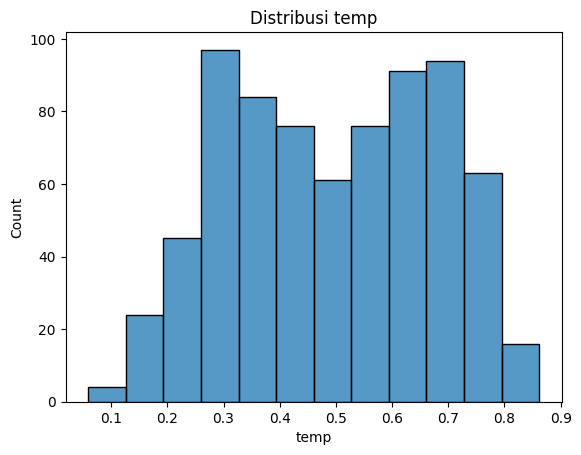

In [12]:
print(sns.histplot(data = day_df, x = 'temp').set(title = "Distribusi temp"))

[Text(0.5, 1.0, 'Distribusi atemp')]


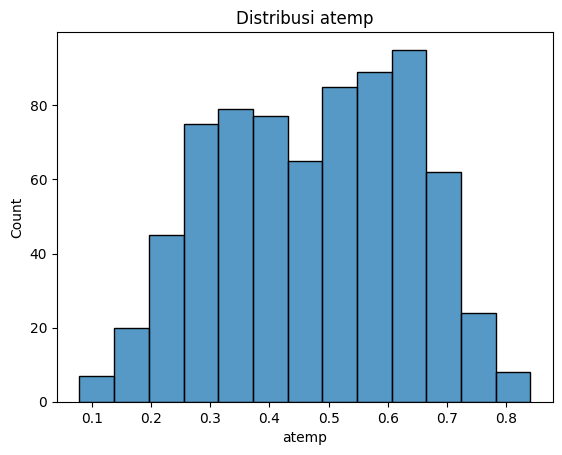

In [13]:
print(sns.histplot(data = day_df, x = 'atemp').set(title = "Distribusi atemp"))

[Text(0.5, 1.0, 'Distribusi hum')]


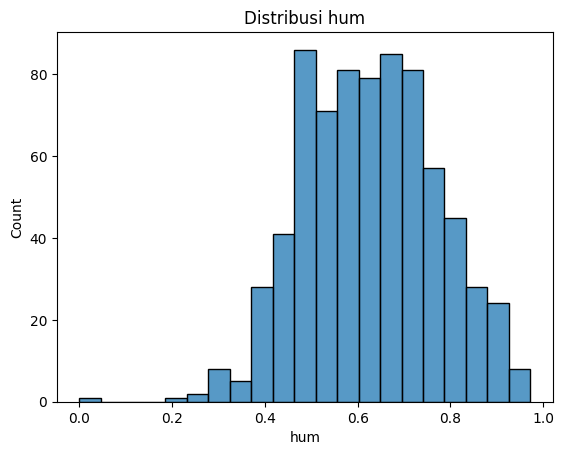

In [14]:
print(sns.histplot(data = day_df, x = 'hum').set(title = "Distribusi hum"))

[Text(0.5, 1.0, 'Distribusi windspeed')]


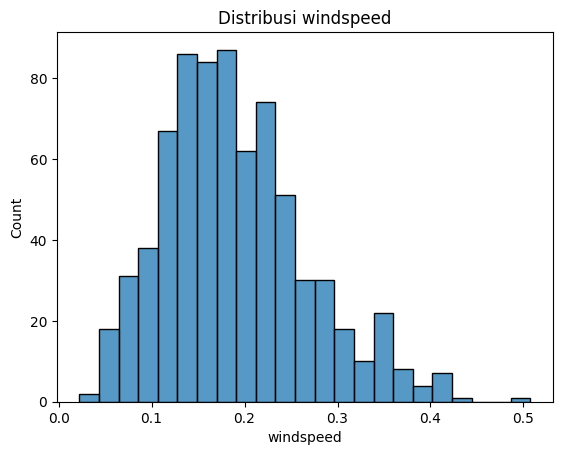

In [15]:
print(sns.histplot(data = day_df, x = 'windspeed').set(title = "Distribusi windspeed"))

[Text(0.5, 1.0, 'Distribusi casual')]


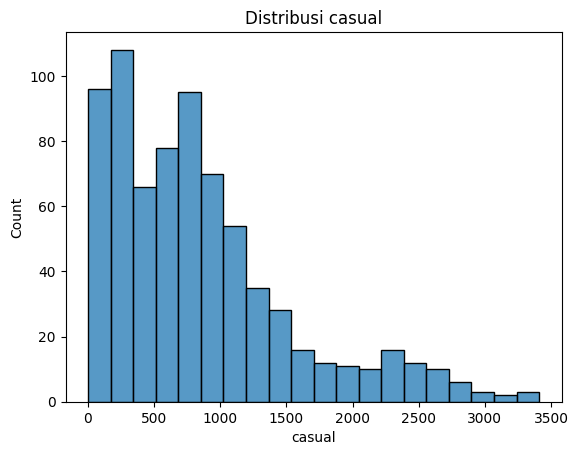

In [16]:
print(sns.histplot(data = day_df, x = 'casual').set(title = "Distribusi casual"))

[Text(0.5, 1.0, 'Distribusi registered')]


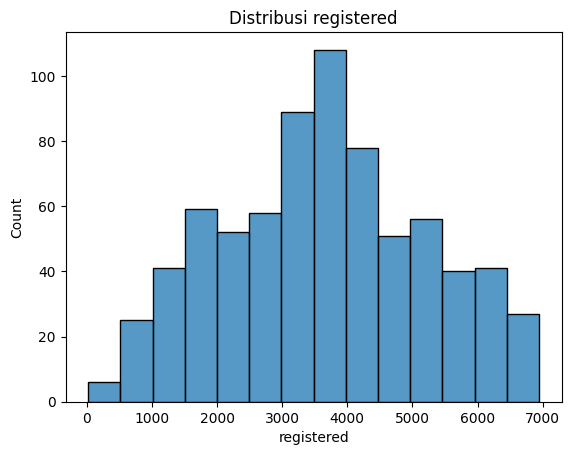

In [17]:
print(sns.histplot(data = day_df, x = 'registered').set(title = "Distribusi registered"))

[Text(0.5, 1.0, 'Distribusi cnt')]


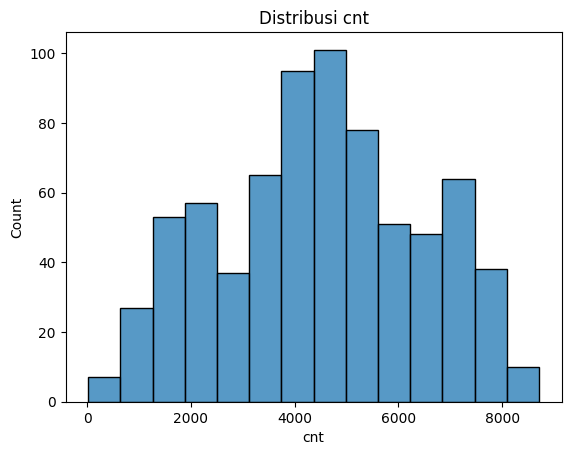

In [18]:
print(sns.histplot(data = day_df, x = 'cnt').set(title = "Distribusi cnt"))

### Distribusi Variabel Kategorik

[Text(0.5, 1.0, 'Distribusi season')]


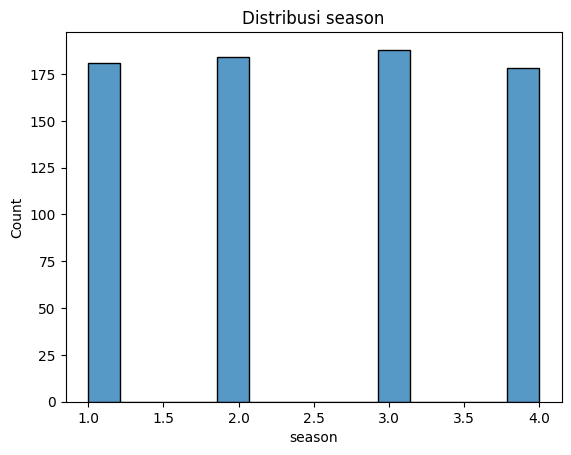

In [19]:
print(sns.histplot(data = day_df, x = 'season').set(title = "Distribusi season"))

[Text(0.5, 1.0, 'Distribusi yr')]


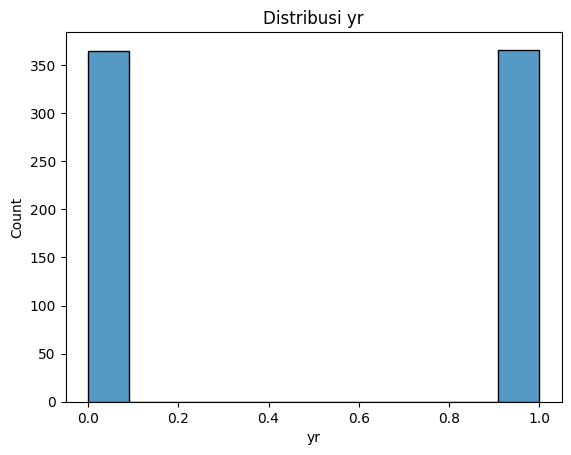

In [20]:
print(sns.histplot(data = day_df, x = 'yr').set(title = "Distribusi yr"))

[Text(0.5, 1.0, 'Distribusi mnth')]


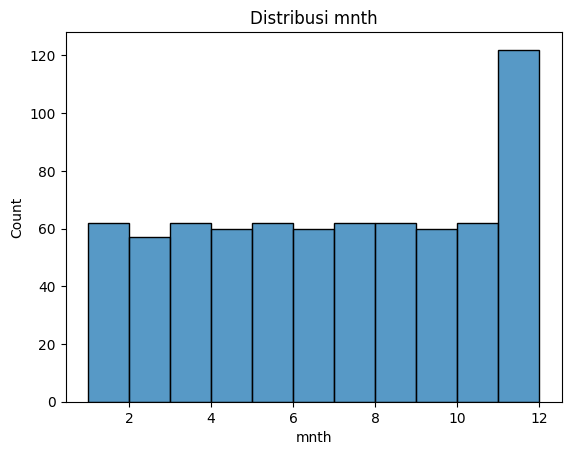

In [21]:
print(sns.histplot(data = day_df, x = 'mnth').set(title = "Distribusi mnth"))

[Text(0.5, 1.0, 'Distribusi holiday')]


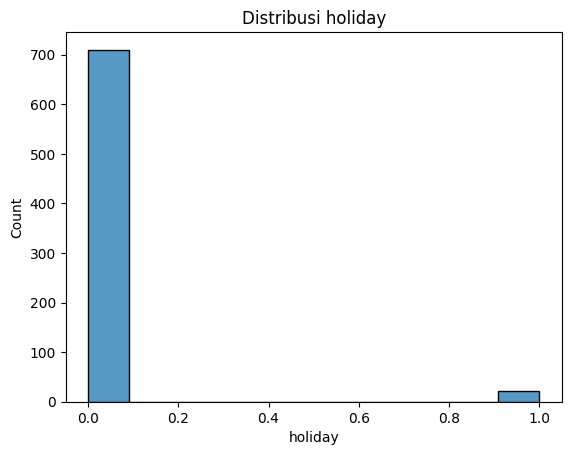

In [22]:
print(sns.histplot(data = day_df, x = 'holiday').set(title = "Distribusi holiday"))

[Text(0.5, 1.0, 'Distribusi weekday')]


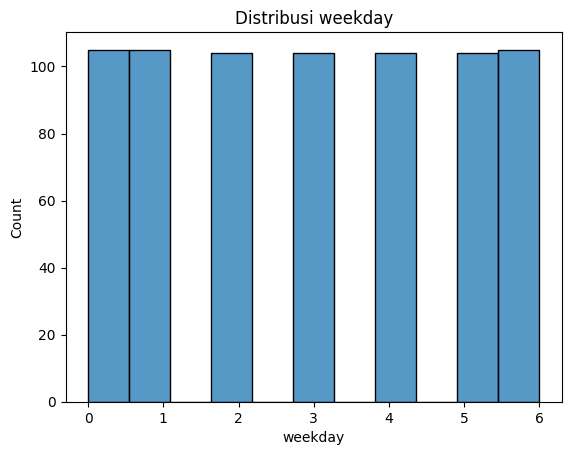

In [23]:
print(sns.histplot(data = day_df, x = 'weekday').set(title = "Distribusi weekday"))

[Text(0.5, 1.0, 'Distribusi workingday')]


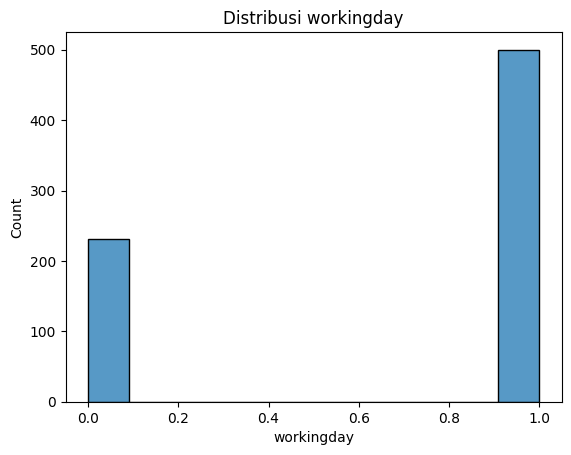

In [24]:
print(sns.histplot(data = day_df, x = 'workingday').set(title = "Distribusi workingday"))

[Text(0.5, 1.0, 'Distribusi weathersit')]


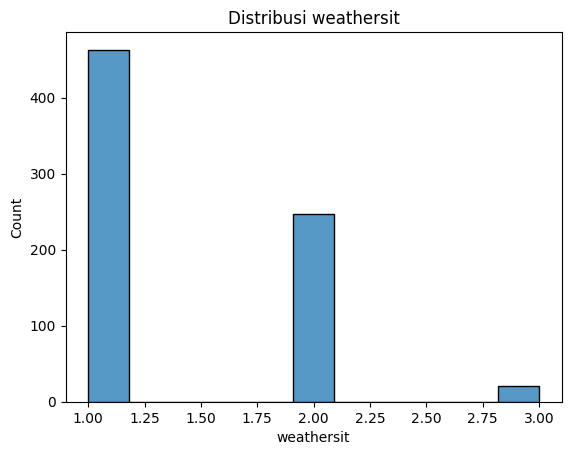

In [25]:
print(sns.histplot(data = day_df, x = 'weathersit').set(title = "Distribusi weathersit"))

### Hubungan Variabel Kategorik dengan Variabel cnt

In [26]:
def annotate_bar_plot(barplot, fontsize=12, num_type=float):
    for bar in barplot.patches:
        position = (bar.get_x() + bar.get_width() / 2, bar.get_height())
        text = f'{bar.get_height():.2f}' if num_type == float else f'{bar.get_height():g}'
        barplot.annotate(text=text, xy=position, ha='center', va='center',
                         size=fontsize, xytext=(0, 8), textcoords='offset points')

palette = sns.color_palette('Set3')

**Season**

<ipython-input-27-405bf9a21c1a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-27-405bf9a21c1a>:11: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


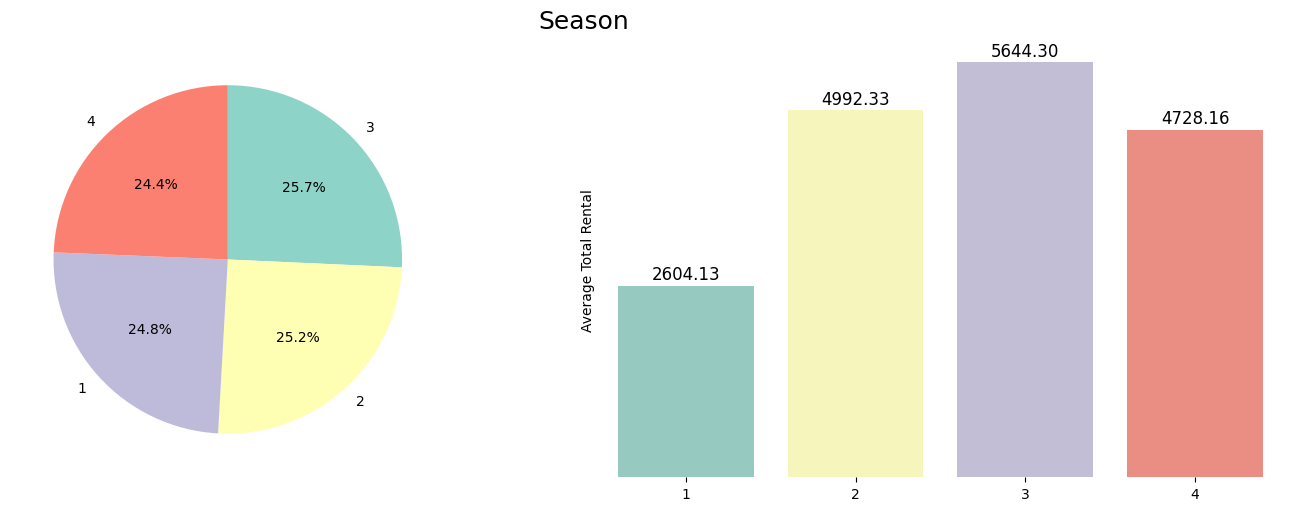

In [27]:
data = day_df['season'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = day_df.groupby('season')['cnt'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average Total Rental')
plt.yticks([])
plt.box(False)

fig.suptitle('Season', fontsize=18)
plt.show()

Dari plot yang ditampilkan, dapat dilihat bahwa rata-rata sewa sepeda banyak digunakan pada musim gugur (season = 3)

**Year**

<ipython-input-28-132fe07d8edf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-28-132fe07d8edf>:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


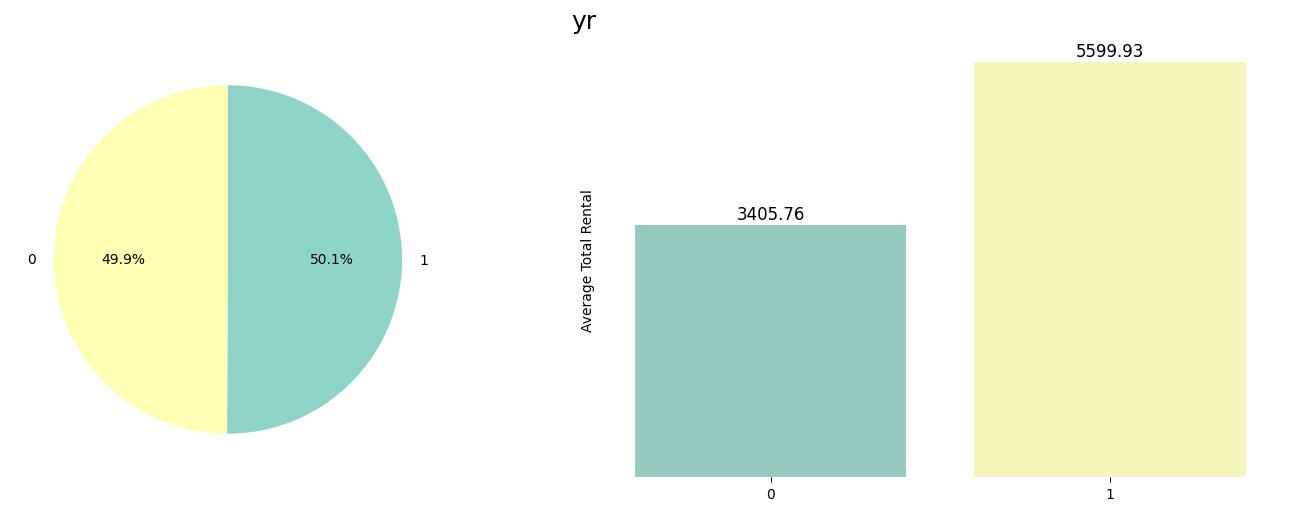

In [28]:
data = day_df['yr'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = day_df.groupby('yr')['cnt'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average Total Rental')
plt.yticks([])
plt.box(False)

fig.suptitle('yr', fontsize=18)
plt.show()

Dari plot dapat dilihat rata-rata sewa sepeda lebih banyak di tahun 2012 (yr = 1)

**Month**

<ipython-input-29-09312c9a179e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)


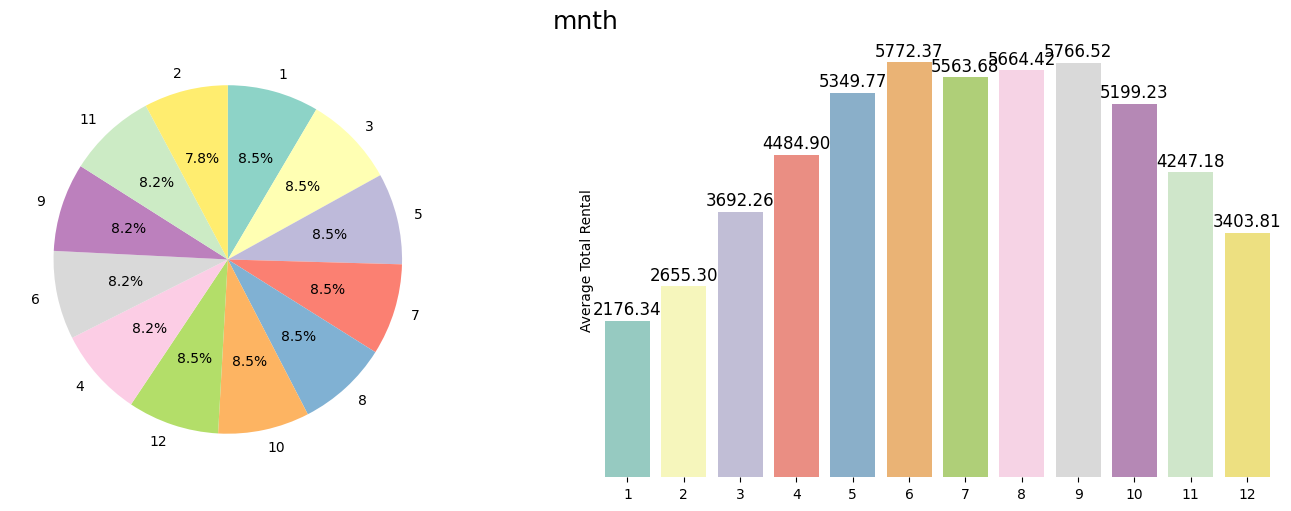

In [29]:
data = day_df['mnth'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = day_df.groupby('mnth')['cnt'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average Total Rental')
plt.yticks([])
plt.box(False)

fig.suptitle('mnth', fontsize=18)
plt.show()

Dari plot yang ditampilkan, dapat dilihat bahwa rata-rata sewa sepeda banyak digunakan pada bulan juni (mnth = 6)

**Holiday**

<ipython-input-30-a033d19897db>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-30-a033d19897db>:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


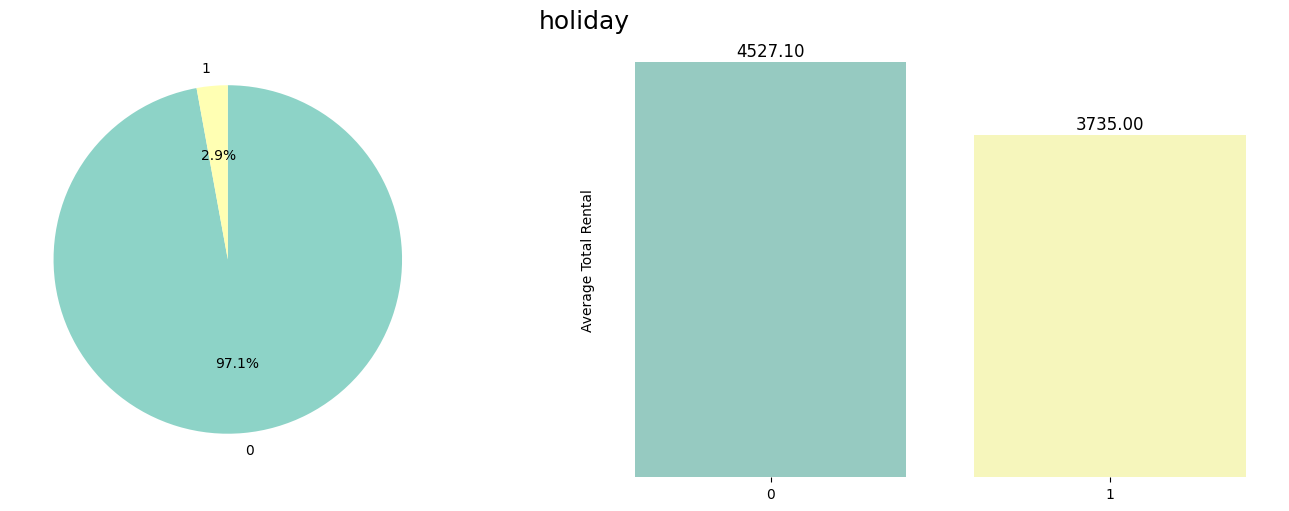

In [30]:
data = day_df['holiday'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = day_df.groupby('holiday')['cnt'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average Total Rental')
plt.yticks([])
plt.box(False)

fig.suptitle('holiday', fontsize=18)
plt.show()

Dari plot yang ditampilkan, dapat dilihat bahwa rata-rata sewa sepeda saat hari libur adalah 3735.

<ipython-input-31-aa84db519883>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-31-aa84db519883>:11: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


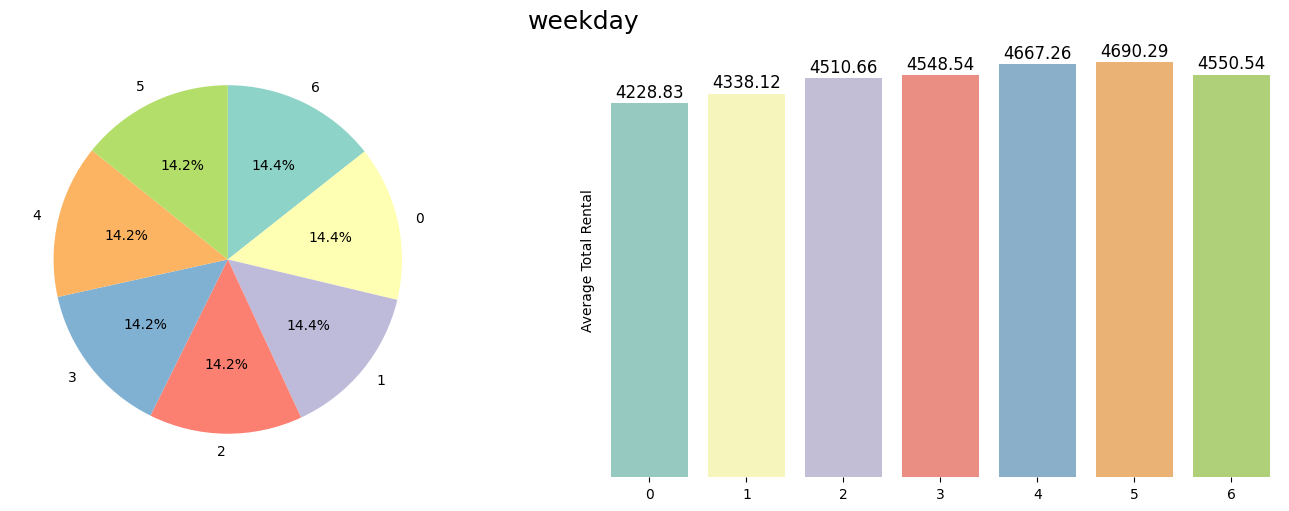

In [31]:
data = day_df['weekday'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = day_df.groupby('weekday')['cnt'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average Total Rental')
plt.yticks([])
plt.box(False)

fig.suptitle('weekday', fontsize=18)
plt.show()

Dari plot yang ditampilkan, dapat dilihat bahwa rata-rata sewa sepeda banyak digunakan pada hari Jum'at (weekday = 5)

**Workingday**

<ipython-input-32-d53926028be5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-32-d53926028be5>:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


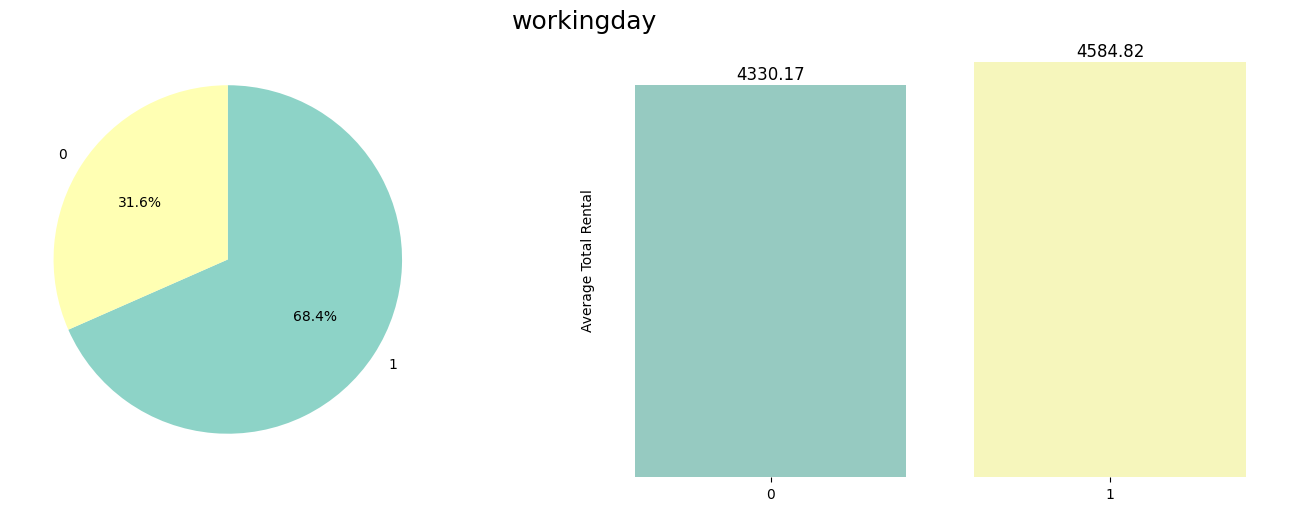

In [32]:
data = day_df['workingday'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = day_df.groupby('workingday')['cnt'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average Total Rental')
plt.yticks([])
plt.box(False)

fig.suptitle('workingday', fontsize=18)
plt.show()

Dari plot yang ditampilkan, dapat dilihat bahwa rata-rata sewa sepeda saat hari kerja adalah 4584.82.

**Weathersit**

<ipython-input-33-ab5563336ad4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-33-ab5563336ad4>:11: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


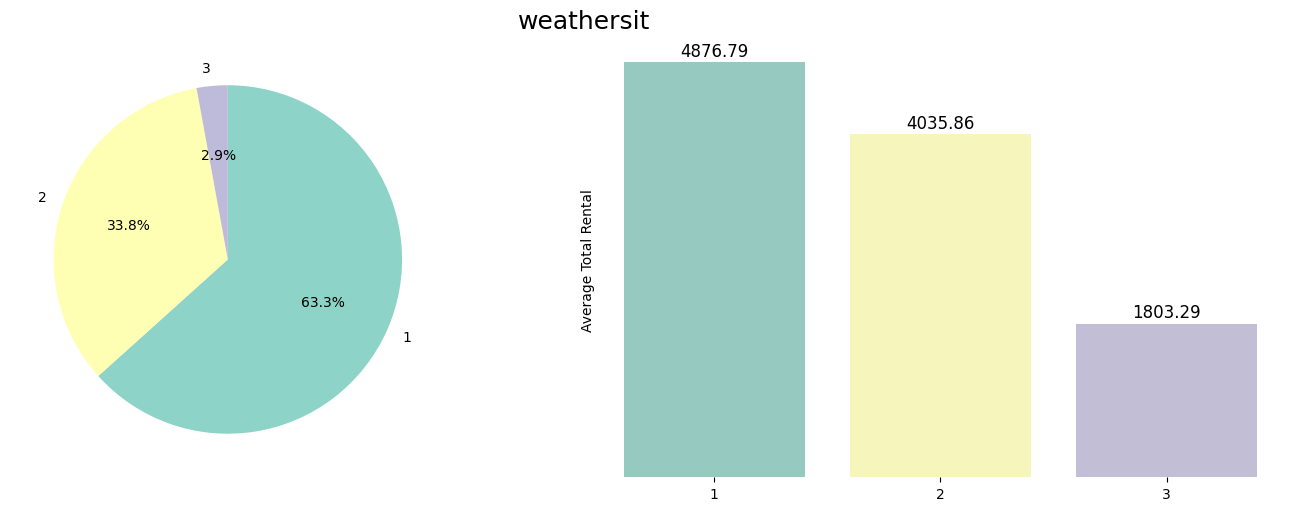

In [33]:
data = day_df['weathersit'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = day_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average Total Rental')
plt.yticks([])
plt.box(False)

fig.suptitle('weathersit', fontsize=18)
plt.show()

Dari plot yang ditampilkan, dapat dilihat bahwa rata-rata sewa sepeda banyak digunakan pada weathersit 1 (Clear, Few clouds, Partly cloudy, Partly cloudy). (weathersit = 1)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda pada tahun 2011?

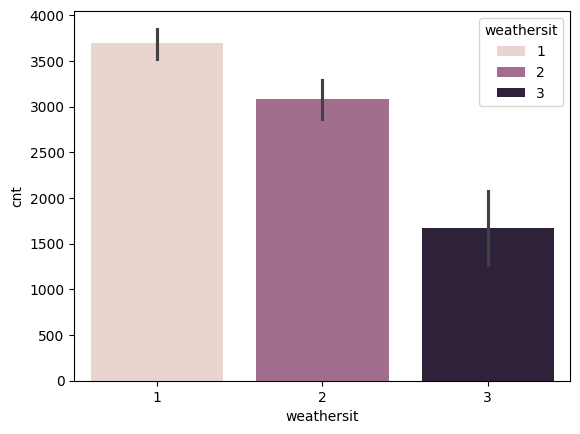

In [34]:
weather_cnt = day_df[(day_df['yr'] == 0)]

weather_cnt_plt = sns.barplot(weather_cnt, x = "weathersit", y = "cnt", hue = "weathersit")

Informasi :
- weathersit :
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Dari grafik yang ditampilkan, dapat dilihat bahwa cuaca memberikan pengaruh yang signifikan terhadap jumlah sewa sepeda pada tahun 2011. Terlihat bahwa cuaca yang baik seperti cerah, agak berawan (weathersit = 1) akan membuat orang lebih tertarik untuk melakukan sewa sepeda.

Analisis ini menunjukkan bahwa kondisi cuaca dapat menjadi faktor yang harus diperhatikan para penyedia layanan sewa sepeda karena dapat memengaruhi jumlah permintaan sewa. Hal-hal seperti stok sepeda yang harus disediakan, biaya sewa, atau teknik pemasaran harus diperhatikan dan disesuaikan dengan kondisi cuaca.

### Pertanyaan 2: Berapa banyak orang yang menggunakan sewa sepeda pada hari kerja selama musim gugur?


In [35]:
workday_fall = day_df[(day_df["workingday"] == 1) & (day_df["season"] == 3)]

count_total = workday_fall["cnt"].sum()

print("Jumlah orang yang menggunakan sewa sepeda pada hari kerja selama musim gugur adalah", count_total)

Jumlah orang yang menggunakan sewa sepeda pada hari kerja selama musim gugur adalah 749073


### Pertanyaan 3 : Berapa distribusi per jam untuk sewa sepeda bagi orang casual pada hari libur tahun 2012.

In [36]:
# Filter data tahun 2012 (yr = 1), hari libur (holiday = 1)
holiday_2012 = hour_df[(hour_df["yr"] == 1) & (hour_df["holiday"] == 1)]

# Hitung distribusi per jam sewa sepeda (cnt)
dist_per_hour = holiday_2012.groupby("hr")["casual"].sum()

print("Distribusi per jam sewa sepeda pada hari libur tahun 2012:")
print(dist_per_hour)

Distribusi per jam sewa sepeda pada hari libur tahun 2012:
hr
0      131
1       83
2       79
3       27
4       18
5       23
6       44
7       93
8      297
9      526
10     838
11    1135
12    1147
13    1245
14    1224
15    1046
16    1036
17     903
18     711
19     578
20     570
21     425
22     319
23     113
Name: casual, dtype: int64


Dari hasil yang ditampilkan, terlihat bahwa pada hari libur tahun 2012, pengguna casual banyak menggunakan sewa sepeda di siang sampai ke sore hari, yaitu dimulai dari sekitar jam 11 siang sampai jam 4 sore, dimana puncaknya berada di jam 1 siang yang mencapai 1245 sewa. Hal ini dapat menjadi pertimbangan para penyedia layanan sewa sepeda pada tahun-tahun berikutnya, dimana mungkin mereka dapat menentukan berapa jumlah sepeda yang harus disediakan pada jam-jam ramai tersebut.

### Pertanyaan 4 : Bagaimana cara meningkatkan sewa sepeda bagi pengguna terdaftar pada hari kerja?

<Axes: xlabel='weekday', ylabel='registered'>

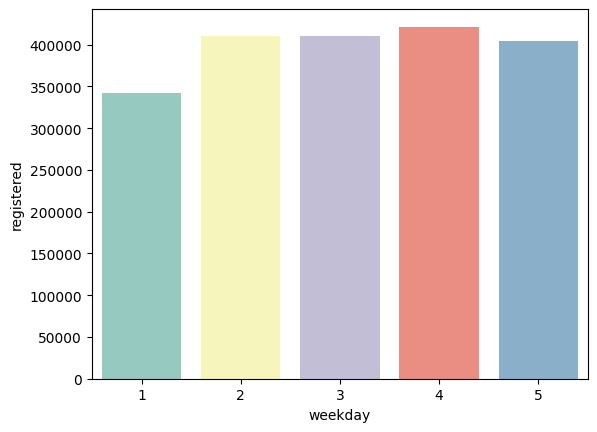

In [38]:
import warnings
warnings.filterwarnings('ignore')
#filter data hari kerja(workingday = 1)
workday = day_df[(day_df["workingday"] == 1) & (day_df['registered']>0)]

data = workday.groupby('weekday')['registered'].sum()

sns.barplot(x=data.index, y=data, palette=palette)

Beberapa cara yang dapat dilakukan untuk meningkatkan sewa sepeda bagi pengguna terdaftar :
1. Memberikan promosi bagi pengguna terdaftar pada hari-hari yang jumlah sewanya sedikit, seperti hari senin.
2. Memberikan poin atau penghargaan setiap kali menggunakan layanan sewa pada hari kerja, dimana poin tersebut dapat ditukar menjadi diskon pada penggunaan selanjutnya.
3. Melakukan komunikasi langsung dengan pengguna terdaftar seperti melakukan penawaran melalui emai, pesan teks, atau yang lainnya.
4. Menyediakan stasiun penyewaan sepeda yang mudah diakses di lokasi strategis dan memastikan kondisi sepeda ada dalam keadaan baik pada hari kerja.

## Conclusion

1. Cuaca memberikan pengaruh yang signifikan pada jumlah sewa sepeda.
2. Sewa sepeda pada hari kerja selama musim gugur mencapai 749.073. menunjukkan potensi bisnis yang kuat.
3. Jumlah sewa sepeda pada hari libur tahun 2012 meningkat di jam 11:00 sampai 16:00, dimana puncaknya terjadi di jam 13:00.
4. Sewa sepeda paling banyak terjadi pada hari (4), menunjukkan bahwa penggunaan sewa sepeda lebih banyak terjadi di pertengahan minggu.